In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fish.csv to fish.csv


In [ ]:
data = pd.read_csv('fish.csv', header = None)
data.head()

0      1     2     3     4     5     6
0  Bream  242.0  23.2  25.4  30.0  38.4  13.4
1  Bream  290.0  24.0  26.3  31.2  40.0  13.8
2  Bream  340.0  23.9  26.5  31.1  39.8  15.1
3  Bream  363.0  26.3  29.0  33.5  38.0  13.3
4  Bream  430.0  26.5  29.0  34.0  36.6  15.1

In [ ]:
col_names = ['Type', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [ ]:
data.columns = col_names
data.head()

Type  Weight  Length1  Length2  Length3  Height  Width
0  Bream   242.0     23.2     25.4     30.0    38.4   13.4
1  Bream   290.0     24.0     26.3     31.2    40.0   13.8
2  Bream   340.0     23.9     26.5     31.1    39.8   15.1
3  Bream   363.0     26.3     29.0     33.5    38.0   13.3
4  Bream   430.0     26.5     29.0     34.0    36.6   15.1

In [ ]:
X = data[['Weight','Length1']]
X.head(3)

Weight  Length1
0   242.0     23.2
1   290.0     24.0
2   340.0     23.9

In [ ]:
# importing k means
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

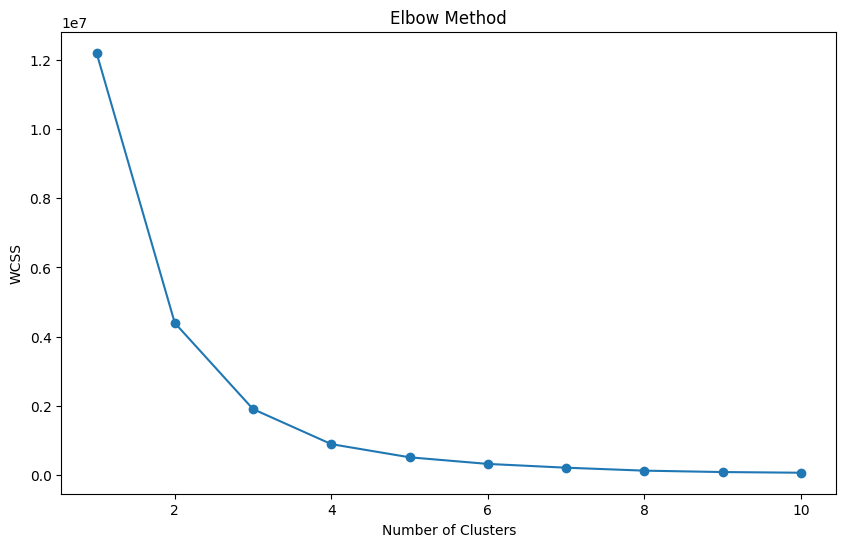

In [ ]:
# plotting the elbow method
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [ ]:
# Adding cluster labels to the dataset
data['Cluster'] = y_kmeans
data.head()

Type  Weight  Length1  Length2  Length3  Height  Width  Cluster
0  Bream   242.0     23.2     25.4     30.0    38.4   13.4        0
1  Bream   290.0     24.0     26.3     31.2    40.0   13.8        3
2  Bream   340.0     23.9     26.5     31.1    39.8   15.1        3
3  Bream   363.0     26.3     29.0     33.5    38.0   13.3        3
4  Bream   430.0     26.5     29.0     34.0    36.6   15.1        3

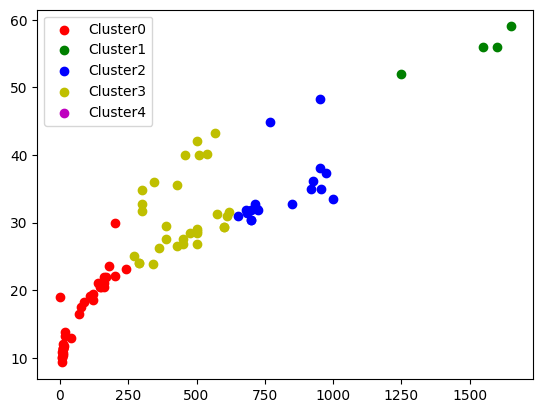

In [ ]:
# assigning custom colors to clusters
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = X[y_kmeans ==i]
  plt.scatter(cluster_data['Weight'],
              cluster_data['Length1'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [ ]:
# function to predict cluster for a new fish
def predict_cluster(Weight, Length):
  new_data = [[Weight,Length]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [ ]:
# example
new_fish_Weight = 290
new_fish_Length = 24

predicted_cluster = predict_cluster(new_fish_Weight,new_fish_Length)
print(f'The fish belongs to cluster: {predicted_cluster}')

The fish belongs to cluster: 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.6120914452578201
